In [1]:
%load_ext jupyternotify

# import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
# import timeit
import main
import joblib
import importlib
import xgboost as xgb

from tqdm.auto import tqdm
# from scipy.stats import *

pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [2]:
from xgboost import XGBClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [4]:
np.set_printoptions(suppress=True)

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [6]:
def clf_performance(classifier, title=None):
    if title != None:
        print(title)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [321]:
# data_df = pd.read_csv('data/PA_data_merged_19_weighted_012223.csv', index_col=[0])

In [420]:
data_df = pd.read_csv('data/PA_data_merged_19_weighted_012223.csv', index_col=[0])

In [507]:
def process_df(df, batter_list, pitcher_list):
    
    df = df[(df['pitcher'].isin(pitcher_list))&(df['batter'].isin(batter_list))].copy()
    df['pitcher'] = df['pitcher'].astype('category')
    df['batter'] = df['batter'].astype('category')
    df['ump_id'] = df['ump_id'].astype('category')
    df['ump_id'] = df['ump_id'].astype('category')

    df['weather_cond'] = df['weather_cond'].str.replace(' ', '').copy()
    df['weather_cond'] = 'weather_cond_' + df['weather_cond']
    df['wind_direction'] = df['wind_direction'].str.replace(' ', '').copy()
    df['wind_direction'] = 'wind_dir_' + df['wind_direction']
    df['roof_cond'] = 'roof_cond_' + df['roof_cond']

    df = pd.concat([df, pd.get_dummies(df['weather_cond'])], axis=1)
    df = pd.concat([df, pd.get_dummies(df['wind_direction'])], axis=1)
    df = pd.concat([df, pd.get_dummies(df['roof_cond'])], axis=1)
    
    return df

In [550]:
X_col_full = ['game_year', 'pitcher', 'batter', 'ump_id', 'temp', 'wind_speed', 'platoon', 'sprint_speed']\
                + list(data_df['weather_cond'].unique()) + list(data_df['wind_direction'].unique())\
                + list(data_df['wind_direction'].unique()) + list(data_df['roof_cond'].unique())\
                + ['1B_pf', '2B_pf', '3B_pf', 'HR_pf', 'BB_pf', 'K_pf']

In [425]:
train_val_df, test_df = train_test_split(data_df, test_size=0.2, random_state=0, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=0, shuffle=True)
print(f"train size: {train_df.shape}")
print(f"val size: {val_df.shape}")
print(f"test size: {test_df.shape}")

train size: (50196, 66)
val size: (16732, 66)
test size: (16733, 66)


In [426]:
# baseline_proba_all = data_df[main.PROBA_LIST].values
# baseline_proba_train = train_df[main.PROBA_LIST].values
# baseline_proba_val = val_df[main.PROBA_LIST].values
# baseline_proba_train_val = train_val_df[main.PROBA_LIST].values
# baseline_proba_test = test_df[main.PROBA_LIST].values

In [427]:
y_all = data_df[main.EVENT_LIST].values
y_train = train_df[main.EVENT_LIST].values
y_val = val_df[main.EVENT_LIST].values
y_train_val = train_val_df[main.EVENT_LIST].values
y_test = test_df[main.EVENT_LIST].values

In [428]:
# new 
main.get_brier_score(baseline_proba_test, y_test)

0.7022930107640629

In [295]:
# X_col = ['pitcher', 'batter', 'platoon']
# X_train = train_df[X_col].values
# X_test = test_df[X_col].values

# clf = XGBClassifier(random_state=0, tree_method='exact')
# xgb_def = clf.fit(X_train, y_train)

# proba_arr = xgb_def.predict_proba(X_test)
# proba_arr = main.normalize_P(proba_arr)

In [154]:
# # X: pitcher, batter, platoon

# baseline_weight = 0.8
# proba_arr_new = baseline_proba_test*baseline_weight + proba_arr*(1-baseline_weight)
# main.get_brier_score(proba_arr_new, y_test)

# # bscore: 0.7019216351070303

0.7017426554195402

# Full Variables

In [331]:
X_train = train_df[X_col_full].values
X_test = test_df[X_col_full].values

In [392]:
X_col_full

['pitcher',
 'batter',
 'ump_id',
 'temp',
 'wind_speed',
 'platoon',
 'sprint_speed',
 'weather_cond_Overcast',
 'weather_cond_PartlyCloudy',
 'weather_cond_Clear',
 'weather_cond_Cloudy',
 'weather_cond_Sunny',
 'weather_cond_RoofClosed',
 'weather_cond_Rain',
 'weather_cond_Drizzle',
 'weather_cond_Dome',
 'wind_dir_OutToLF',
 'wind_dir_RToL',
 'wind_dir_OutToRF',
 'wind_dir_LToR',
 'wind_dir_OutToCF',
 'wind_dir_None',
 'wind_dir_Varies',
 'wind_dir_InFromRF',
 'wind_dir_InFromLF',
 'wind_dir_InFromCF',
 'wind_dir_Calm',
 'wind_dir_OutToLF',
 'wind_dir_RToL',
 'wind_dir_OutToRF',
 'wind_dir_LToR',
 'wind_dir_OutToCF',
 'wind_dir_None',
 'wind_dir_Varies',
 'wind_dir_InFromRF',
 'wind_dir_InFromLF',
 'wind_dir_InFromCF',
 'wind_dir_Calm',
 'roof_cond_OpenAir',
 'roof_cond_RoofClosed',
 '1B_pf',
 '2B_pf',
 '3B_pf',
 'HR_pf',
 'BB_pf',
 'K_pf']

In [332]:
start = time.time()

In [391]:
X_coll_full

NameError: name 'X_coll_full' is not defined

In [333]:
clf = XGBClassifier(random_state=0, tree_method='hist', enable_categorical=True)
xgb_full = clf.fit(X_train, y_train)

In [334]:
time.time() - start

2.7268290519714355

In [335]:
proba_arr = xgb_full.predict_proba(X_test)
proba_arr = main.normalize_P(proba_arr)

In [345]:
baseline_weight = 0.89
proba_arr_new = baseline_proba_test*baseline_weight + proba_arr*(1-baseline_weight)
main.get_brier_score(proba_arr_new, y_test)

# bscore: 0.7019216351070303

0.7018802183589026

In [346]:
xgb_full.get_booster().feature_names = X_col_full

In [394]:
X_test

array([[0.1392214 , 0.04051488, 0.00479236, ..., 0.09665544, 0.17363826,
        0.00067245],
       [0.15970923, 0.03928761, 0.00095291, ..., 0.15225641, 0.22476981,
        0.00241161],
       [0.16261056, 0.04334372, 0.00954498, ..., 0.1492422 , 0.25748629,
        0.        ],
       ...,
       [0.16135458, 0.03984064, 0.00398406, ..., 0.13049532, 0.24425252,
        0.00531402],
       [0.13676162, 0.03376957, 0.00715892, ..., 0.05095861, 0.16028365,
        0.00246583],
       [0.14991333, 0.05295746, 0.00113822, ..., 0.08876428, 0.27967403,
        0.00109502]])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

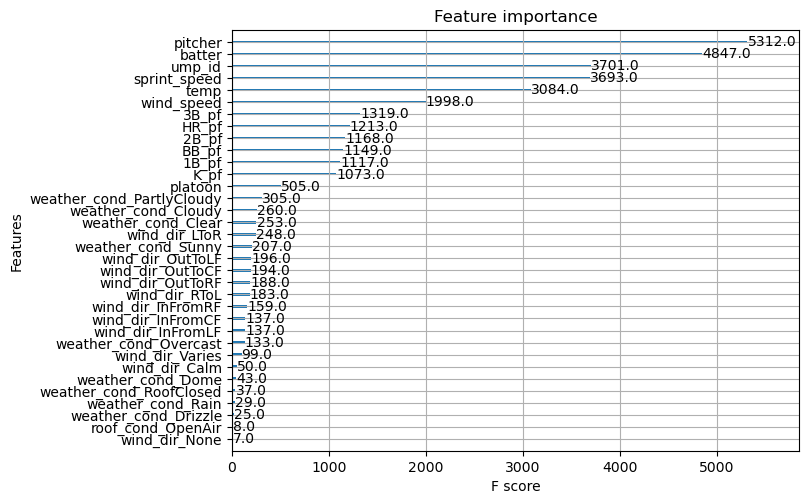

In [347]:
fig, ax = plt.subplots()
plt.tight_layout()
xgb.plot_importance(xgb_full.get_booster(), height=0.2, ax=ax)

# RFE

In [232]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [239]:
start = time.time()

In [240]:
clf = XGBClassifier(random_state=0, tree_method='hist', enable_categorical=True)
rfecv = RFECV(estimator=clf, step=1, cv=4, scoring='accuracy', n_jobs=5, verbose=2)
rfecv = rfecv.fit(X_train, y_train)

Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.


In [241]:
time.time() - start

157.28048825263977

In [348]:
rfecv.n_features_
# optimal number of features: 28

28

## run RFE based on 28 features

In [349]:
start = time.time()

In [350]:
# create the XGBoost model
clf = XGBClassifier(random_state=0, tree_method='hist', enable_categorical=True)
# create the RFE model and select 10 features
rfe = RFE(clf, n_features_to_select=28)
rfe = rfe.fit(X_train, y_train)

In [351]:
time.time() - start

36.85479211807251

In [352]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False  True  True  True  True  True  True
  True False False  True  True False  True  True  True False  True  True
  True  True False False False False False False False False False False
 False False  True False  True  True  True  True  True  True]
[ 1  1  1  1  1  3  1  1  1  1  1  1  1  4  6  1  1  2  1  1  1  5  1  1
  1  1  7  8  9 14 13 10 17 18 19 16 11 12  1 15  1  1  1  1  1  1]


In [353]:
features_selected = np.array(X_col_full)[rfe.support_]

In [354]:
[x for x in X_col_full if x not in features_selected]

['platoon',
 'weather_cond_Rain',
 'weather_cond_Drizzle',
 'wind_dir_RToL',
 'wind_dir_None',
 'wind_dir_Calm',
 'wind_dir_RToL',
 'wind_dir_None',
 'wind_dir_Calm',
 'roof_cond_RoofClosed']

In [355]:
X_train = train_df[features_selected].values
X_test = test_df[features_selected].values

In [356]:
start = time.time()

In [357]:
clf = XGBClassifier(random_state=0, tree_method='hist', enable_categorical=True)
xgb_full = clf.fit(X_train, y_train)

In [358]:
time.time() - start

1.8187079429626465

In [359]:
proba_arr = xgb_full.predict_proba(X_test)
proba_arr = main.normalize_P(proba_arr)

In [361]:
baseline_weight = 0.89
proba_arr_new = baseline_proba_test*baseline_weight + proba_arr*(1-baseline_weight)
main.get_brier_score(proba_arr_new, y_test)

# bscore: 0.7019216351070303

0.7020142060924919

In [362]:
data_df

,pa_index,game_year,game_pk,at_bat_number,pitcher,batter,home_team,stand,p_throws,event_type,des,1B,2B,3B,HR,FO,BB,K,other,1B_proba,2B_proba,3B_proba,HR_proba,FO_proba,BB_proba,K_proba,other_proba,weather_cond,temp,ump_id,ump_name,wind_speed,wind_direction,roof_cond,bat_side,condition,1B_pf,2B_pf,3B_pf,HR_pf,BB_pf,K_pf,platoon,sprint_speed,weather_cond_Clear,weather_cond_Cloudy,weather_cond_Dome,weather_cond_Drizzle,weather_cond_Overcast,weather_cond_PartlyCloudy,weather_cond_Rain,weather_cond_RoofClosed,weather_cond_Sunny,wind_dir_Calm,wind_dir_InFromCF,wind_dir_InFromLF,wind_dir_InFromRF,wind_dir_LToR,wind_dir_None,wind_dir_OutToCF,wind_dir_OutToLF,wind_dir_OutToRF,wind_dir_RToL,wind_dir_Varies,roof_cond_OpenAir,roof_cond_RoofClosed
0,0,2019,564734,1,518774,425783,LAA,L,R,BB,Shin-Soo Choo hit by pitch.,0,0,0,0,0,1,0,0,0.151462,0.042527,0.002745,0.034862,0.433322,0.117495,0.215581,0.002005,weather_cond_Overcast,61,482663,David Rackley,6,wind_dir_OutToLF,roof_cond_OpenAir,L,OpenAir,95.0,79.0,95.0,117.0,100.0,103.0,True,26.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,2019,564734,2,518774,596059,LAA,L,R,K,Rougned Odor strikes out swinging.,0,0,0,0,0,0,1,0,0.145903,0.043049,0.005270,0.038165,0.468883,0.077595,0.219063,0.002071,weather_cond_Overcast,61,482663,David Rackley,6,wind_dir_OutToLF,roof_cond_OpenAir,L,OpenAir,95.0,79.0,95.0,117.0,100.0,103.0,True,27.9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,2019,564734,3,518774,462101,LAA,R,R,1B,Elvis Andrus singles on a line drive to right ...,1,0,0,0,0,0,0,0,0.167873,0.048945,0.006373,0.023627,0.518301,0.072414,0.161688,0.000779,weather_cond_Overcast,61,482663,David Rackley,6,wind_dir_OutToLF,roof_cond_OpenAir,R,OpenAir,101.0,109.0,79.0,90.0,101.0,106.0,False,26.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3,2019,564734,4,518774,608336,LAA,L,R,HR,Joey Gallo homers (2) on a fly ball to center ...,0,0,0,1,0,0,0,0,0.101731,0.040880,0.003790,0.058282,0.380076,0.109429,0.304930,0.000883,weather_cond_Overcast,61,482663,David Rackley,6,wind_dir_OutToLF,roof_cond_OpenAir,L,OpenAir,95.0,79.0,95.0,117.0,100.0,103.0,True,27.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,2019,564734,5,518774,452678,LAA,L,R,BB,Asdrubal Cabrera walks.,0,0,0,0,0,1,0,0,0.151455,0.054413,0.003026,0.036548,0.484045,0.076387,0.191026,0.003100,weather_cond_Overcast,61,482663,David Rackley,6,wind_dir_OutToLF,roof_cond_OpenAir,L,OpenAir,95.0,79.0,95.0,117.0,100.0,103.0,True,25.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83656,83656,2019,567632,41,593140,519346,MIL,L,R,HR,Eric Thames homers (23) on a fly ball to cente...,0,0,0,1,0,0,0,0,0.106673,0.044095,0.008567,0.048761,0.357216,0.111985,0.320575,0.002129,weather_cond_RoofClosed,77,427113,Laz Diaz,0,wind_dir_None,roof_cond_RoofClosed,L,RoofClosed,101.0,84.0,72.0,107.0,116.0,103.0,True,26.7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
83657,83657,2019,567632,42,593140,456715,MIL,R,R,BB,Lorenzo Cain walks.,0,0,0,0,0,1,0,0,0.181969,0.046169,0.004775,0.022485,0.435797,0.111114,0.195688,0.002003,weather_cond_RoofClosed,77,427113,Laz Diaz,0,wind_dir_None,roof_cond_RoofClosed,R,RoofClosed,96.0,79.0,61.0,115.0,101.0,119.0,False,27.9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
83658,83658,2019,567632,43,593140,592325,MIL,L,R,K,Ben Gamel strikes out swinging.,0,0,0,0,0,0,1,0,0.161027,0.050449,0.010070,0.015037,0.419614,0.106708,0.232275,0.004820,weather_cond_RoofClosed,77,427113,Laz Diaz,0,wind_dir_None,roof_cond_RoofClosed,L,RoofClosed,101.0,84.0,72.0,107.0,116.0,103.0,True,28.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
83659,83659,2019,567632,44,593140,606115,MIL,R,R,FO,"Orlando Arcia grounds out, third baseman Erik ...",0,0,0,0,1,0,0,0,0.158929,0.046313,0.003127,0.018793,0.466556,0.065023,0.2399

# Seperated

In [375]:
data_seperated_df = pd.read_csv('data/PA_data_19_seperated.csv', index_col=[0])

In [376]:
train_val_df, test_df = train_test_split(data_seperated_df, test_size=0.2, random_state=0, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=0, shuffle=True)
print(f"train size: {train_df.shape}")
print(f"val size: {val_df.shape}")
print(f"test size: {test_df.shape}")

train size: (50196, 42)
val size: (16732, 42)
test size: (16733, 42)


In [381]:
P_PROBA_LIST = [p + '_p' for p in main.PROBA_LIST]
B_PROBA_LIST = [p + '_b' for p in main.PROBA_LIST]

In [386]:
X_train = train_df[P_PROBA_LIST + B_PROBA_LIST].values
X_test = test_df[P_PROBA_LIST + B_PROBA_LIST].values

In [387]:
clf = XGBClassifier(random_state=0, tree_method='hist', enable_categorical=True)
xgb_full = clf.fit(X_train, y_train)

In [388]:
proba_arr = xgb_full.predict_proba(X_test)
proba_arr = main.normalize_P(proba_arr)

In [390]:
main.get_brier_score(y_test, proba_arr)

0.7335457246631587

# Use 15-19 data

In [755]:
T_batters_dict_weighted = joblib.load('data/T/T_batters_dict_1518_weighted')
T_pitchers_dict_weighted = joblib.load('data/T/T_pitchers_dict_1518_weighted')

batters_quali_list = list(T_batters_dict_weighted.keys())
pitchers_quali_list = list(T_pitchers_dict_weighted.keys())

In [756]:
len(batters_quali_list)

491

In [757]:
len(pitchers_quali_list)

487

In [758]:
data_df = pd.read_csv('data/PA_data_merged_15-19_012323.csv', index_col=[0])
test_df = pd.read_csv('data/PA_data_merged_19_weighted_012223.csv', index_col=[0])
data_df = process_df(data_df, batter_list = batters_quali_list, pitcher_list = pitchers_quali_list)
test_df = process_df(test_df, batter_list = batters_quali_list, pitcher_list = pitchers_quali_list)

In [759]:
train_val_df = data_df[data_df['game_year'].isin([2015, 2016, 2017, 2018])].copy()

In [760]:
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=0, shuffle=True)

In [761]:
print(f"train size: {train_df.shape[0]}, {train_df.shape[0]/data_df.shape[0]:.0%}")
print(f"val size: {val_df.shape[0]}, {val_df.shape[0]/data_df.shape[0]:.0%}")
print(f"test size: {test_df.shape[0]}, {test_df.shape[0]/data_df.shape[0]:.0%}")

train size: 408501, 65%
val size: 136168, 22%
test size: 83661, 13%


In [762]:
y_all = data_df[main.EVENT_LIST].values
y_train = train_df[main.EVENT_LIST].values
y_val = val_df[main.EVENT_LIST].values
y_train_val = train_val_df[main.EVENT_LIST].values
y_test = test_df[main.EVENT_LIST].values

In [763]:
baseline_proba_test = test_df[main.PROBA_LIST].values

In [764]:
X_col_full = ['game_year', 'pitcher', 'batter', 'ump_id', 'temp', 'wind_speed', 'platoon', 'sprint_speed']\
                + list(test_df['weather_cond'].unique()) + list(test_df['wind_direction'].unique())\
                + list(test_df['wind_direction'].unique()) + list(test_df['roof_cond'].unique())\
                + ['1B_pf', '2B_pf', '3B_pf', 'HR_pf', 'BB_pf', 'K_pf']

In [765]:
X_col = ['pitcher', 'batter', 'ump_id', 'sprint_speed', 'temp', 'wind_speed', '1B_pf', '2B_pf', '3B_pf', 'HR_pf', 'K_pf', 'BB_pf', 'platoon']
# X_col = ['pitcher', 'batter', 'ump_id', 'sprint_speed']

In [766]:
X_train = train_df[X_col_full].values
X_val = val_df[X_col_full].values
X_test = test_df[X_col_full].values

In [767]:
clf = XGBClassifier(random_state=0, tree_method='hist', enable_categorical=True)
xgb_full = clf.fit(X_train, y_train)



In [768]:
proba_arr = xgb_full.predict_proba(X_test)
proba_arr = main.normalize_P(proba_arr)

In [769]:
# x_col_full
main.get_brier_score(test_df[main.EVENT_LIST].values, proba_arr)

# b score: 0.6994039277752887

0.710268794790117

In [774]:
baseline_weight = 1
proba_arr_new = baseline_proba_test*baseline_weight + proba_arr*(1-baseline_weight)
main.get_brier_score(proba_arr_new, y_test)

# bscore: 0.7019216351070303

0.7033867122887294

# testing using val set

In [690]:
val_df = main.test_T_dict(val_df, T_batters_dict_weighted, T_pitchers_dict_weighted, p_weight=0.34, _return_arr=False, is_pitch_data=False)

  0%|          | 0/73177 [00:00<?, ?it/s]

In [694]:
# baseline b score on val
main.get_brier_score(val_df[main.EVENT_LIST].values, val_df[main.PROBA_LIST].values)

0.6937892407388198

In [695]:
baseline_proba_test = val_df[main.PROBA_LIST].values

In [704]:
baseline_weight = 1
proba_arr_new = baseline_proba_test*baseline_weight + proba_arr*(1-baseline_weight)
main.get_brier_score(proba_arr_new, y_val)

0.6937892407388198

In [705]:
main.get_brier_score(proba_arr, y_val)

0.6991410850892651

# CV

In [ ]:
# default parameters
# max_depth: 3
# learning_rate: 0.1
# n_estimators: 100
# subsample: 1
# colsample_bytree: 1
# reg_alpha: 0
# reg_lambda: 1

In [731]:
start = time.time()

In [732]:
clf = XGBClassifier(random_state=0, tree_method='hist', enable_categorical=True)
param_grid =  {'n_estimators': [150, 250], 
              'max_depth': [6, 8],
              'learning_rate': [0.1, 0.5, 0.05],
              'colsample_bytree': [1, 0.8, 0.5],
              'subsample': [1, 0.5]}
                                  
xgb_full = GridSearchCV(clf, param_grid, cv=5, verbose=1, n_jobs=5)
best_xgb_full = xgb_full.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [733]:
time.time() - start

5612.713330984116

In [734]:
proba_arr = xgb_full.predict_proba(X_val)
proba_arr = main.normalize_P(proba_arr)
main.get_brier_score(val_df[main.EVENT_LIST].values, proba_arr)

0.7579494332373805

In [739]:
baseline_weight = 0.6
proba_arr_new = baseline_proba_test*baseline_weight + proba_arr*(1-baseline_weight)
main.get_brier_score(proba_arr_new, y_val)

0.7027197051015283

In [743]:
help(main.test_T_dict)

Help on function test_T_dict in module main:

test_T_dict(test_df, batter_dict, pitcher_dict, p_weight=0.5, _return_arr=False, is_pitch_data=True) -> pandas.core.frame.DataFrame



In [745]:
ok_df = main.test_T_dict(test_df, T_batters_dict_old, T_pitchers_dict_old, p_weight=0.5, is_pitch_data=False)

  0%|          | 0/31448 [00:00<?, ?it/s]

In [747]:
main.get_brier_score(ok_df[main.EVENT_LIST].values, ok_df[main.PROBA_LIST].values)

ValueError: operands could not be broadcast together with shapes (83661,8) (83661,16) 